In [6]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [7]:
trips_all=pd.read_csv("trip.csv")
trips=trips_all.loc[trips_all.start_date.str.contains('4/'+'\S'+'/2014')]

In [59]:
trips_S = trips[trips['subscription_type']=='Subscriber']
trips_C = trips[trips['subscription_type']=='Customer']

In [30]:
cantidad_viajes_S=trips_S[['duration','id']].groupby('duration').count()
cantidad_viajes_C=trips_C[['duration','id']].groupby('duration').count()
cantidad_viajes_totales = trips_all[['duration','id']].groupby('duration').count()

In [32]:
cantidad_viajes_S1=trips_S[['duration','id']].groupby('duration')
cantidad_viajes_C1=trips_C[['duration','id']].groupby('duration')
cantidad_viajes_totales1 = trips_all[['duration','id']].groupby('duration')

In [88]:
trips_S['duration'].max()
trips_C['duration'].max()

644771

In [89]:
trips_S2 = trips_S.groupby(pd.cut(trips_S.duration, range(0,trips_C['duration'].max()+200, 200))).size() #agrupa cada 200 seg, o sea 3.33 minutos
#trips_S2 es una Serie
cantidad_S2 = trips_S2.count()
cantidad_S2

3224

In [90]:
trips_C2 = trips_C.groupby(pd.cut(trips_C.duration, range(0,trips_C['duration'].max()+200, 200))).size() #agrupa cada 200 seg, o sea 3.33 minutos
#trips_S2 es una Serie
cantidad_C2 = trips_C2.count()
cantidad_C2

3224

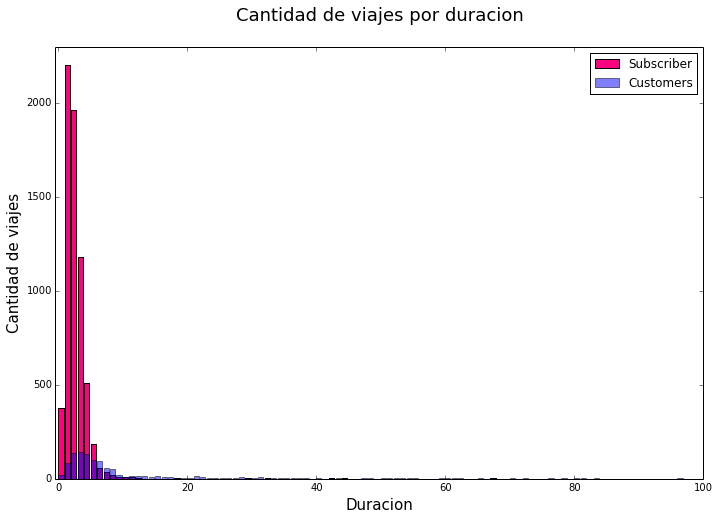

In [97]:
###########################################################################
#FALTA PONER LAS LEYENDAS DE X E Y, LOS NUMEROS #PUSE LIMITE EN X...

from numpy import ma
%matplotlib inline
X=np.arange(cantidad_S2)
Y1=trips_S2
Y2=trips_C2

plot.axes([0.025, 0.025, 1.5, 1.5])
plot.bar(X , Y1, facecolor='#ff007f', label="Subscriber")
plot.bar(X , Y2, alpha=.5, label="Customers")

plot.xlim(-.5,100)
#plot.xticks(trips_S2.index, fontsize = 13)
plot.xlabel('Duracion', fontsize = 15)

plot.ylim(0, 2300) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks((Y))
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes por duracion\n', fontsize = 18)

plot.legend(loc="upper right")
plot.show()

AssertionError: incompatible sizes: argument 'height' must be length 966 or scalar

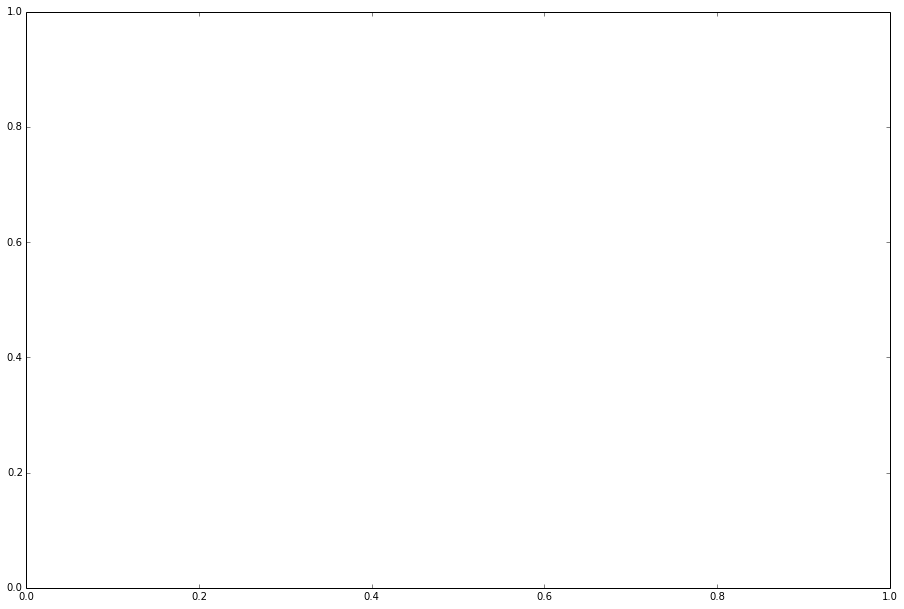

In [29]:
#ESTE NO FUNCIONA PORQUE HAY MUCHOS DATOS

from numpy import ma
%matplotlib inline

X = np.arange(len(cantidad_viajes_C.index))
Y1 = cantidad_viajes_C.loc[:,'id']
Y2 = cantidad_viajes_S.loc[:,'id']
Y3 = cantidad_viajes_totales.loc[:,'id']

plot.axes([0.025, 0.025, 2, 2])
#plot.bar(X + 0.25, Y3, width = 0.5, align="center")
#plot.bar(X - 0.12, Y1, facecolor='#9999ff', edgecolor='white',  alpha=.5, width = 0.25, align="center", label="Customers") #no subscriptos, azul #alpha es la opacidad
plot.bar(X , Y2, facecolor='#ff9999', edgecolor='white',  alpha=.5, width = 0.25, label="Subscriber") #subscriptos, rojo


#for x, y in zip(X, Y1):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'bottom')

#for x, y in zip(X, Y2):
#    plot.text(x + 0.4, y + 0.05, '%.2f' % y, ha='right', va= 'top')

plot.xlim(-.5,len(cantidad_viajes_C.index)-0.5)
#plot.xticks(X, cantidad_viajes_C.index, fontsize = 13)
plot.xlabel('Duracion', fontsize = 15)

#plot.ylim(0, 5400) #solo para que quede lindo, igual deberia ser segun los valores blabla..
#plot.yticks((Y1))
plot.ylabel('Cantidad de viajes', fontsize = 15)

plot.title('Cantidad de viajes por duracion\n', fontsize = 18)

plot.legend(loc="upper left")
plot.show()